### Шарафетдинов Ринат Саярович

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats
import pymc as pm
import arviz as az


sns.set_style("whitegrid")

## Проверяем модели


In [2]:
train_reg = pd.read_csv('regression/train_reg.csv')
X_train = train_reg['x'].values
y_train = train_reg['y'].values

In [3]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=1, sigma=8)
    β = pm.Normal('β', mu=1, sigma=1)
    ε = pm.HalfNormal('ε', 8)
    μ = pm.Deterministic('μ', α + β * X_train)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_train)
    trace = pm.sample(3000, chains=4, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [α, β, ε]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 19 seconds.
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


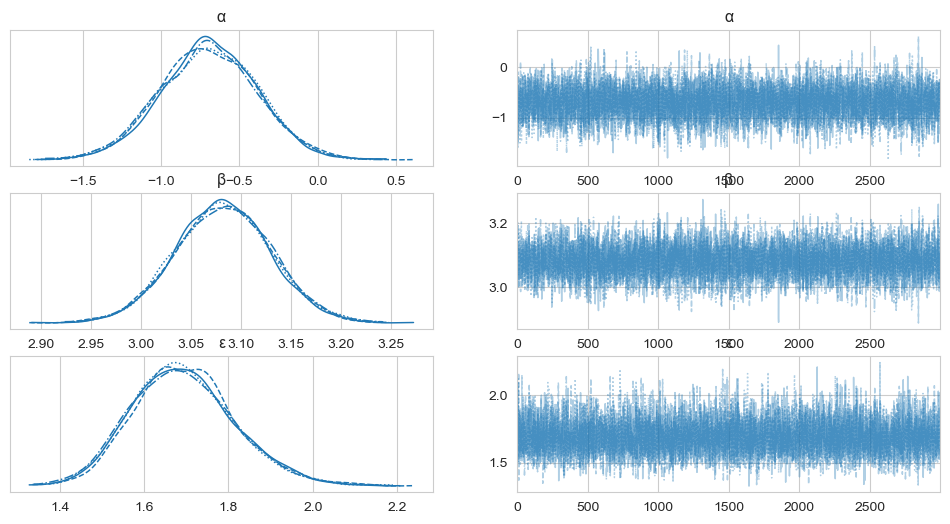

In [4]:
az.plot_trace(trace, var_names=['α', 'β', 'ε']);

In [5]:
az.summary(trace).head(5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.697,0.310,-1.263,-0.101,0.004,0.003,5728.0,6210.0,1.0
β,3.083,0.048,2.990,3.170,0.001,0.000,5613.0,5949.0,1.0
ε,1.694,0.123,1.463,1.922,0.002,0.001,6418.0,6736.0,1.0
μ[0],0.585,0.294,0.049,1.148,0.004,0.003,5824.0,6354.0,1.0
μ[1],5.709,0.234,5.276,6.152,0.003,0.002,6584.0,6962.0,1.0


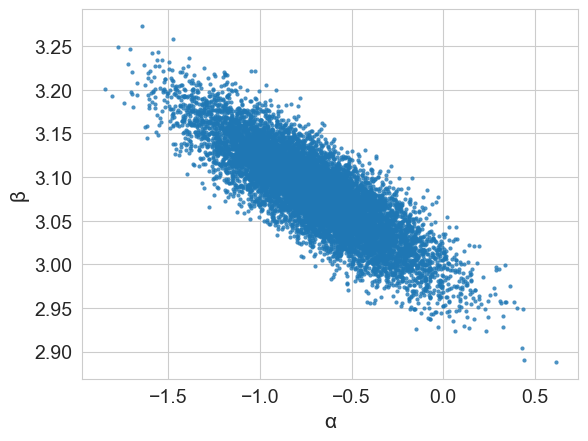

In [6]:
az.plot_pair(trace, var_names=['α', 'β'], scatter_kwargs={'alpha': 0.8});

In [7]:
with pm.Model() as model_m:
    α = pm.Normal('α', mu=0, sigma=8)

    β = pm.Normal('β', mu=1, sigma=3)

    ε = pm.HalfNormal('ε', 10)

    μ = pm.Deterministic('μ', α + β * X_train)

    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_train)
    trace_1 = pm.sample(3000, step=pm.Metropolis())

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [α]
>Metropolis: [β]
>Metropolis: [ε]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


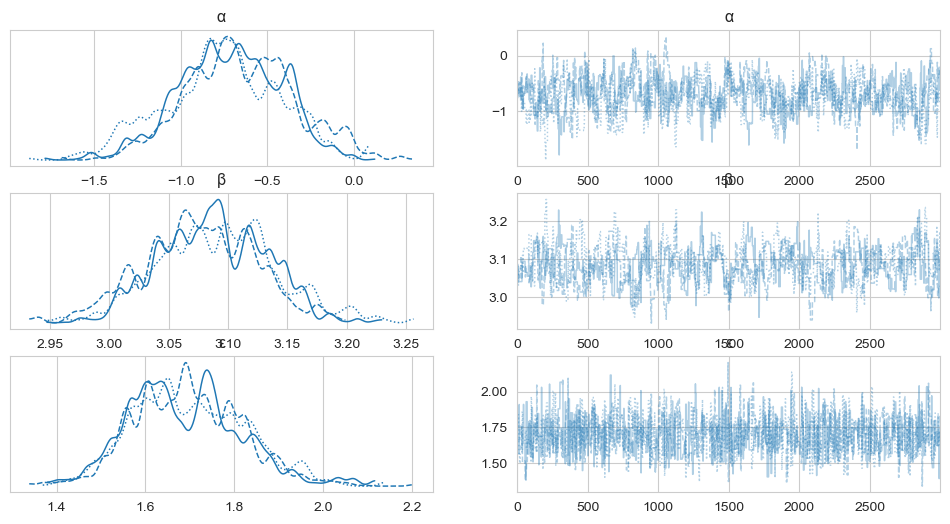

In [8]:
az.plot_trace(trace_1, var_names=['α', 'β', 'ε']);

In [9]:
az.summary(trace_1).head(5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.709,0.315,-1.339,-0.153,0.020,0.015,231.0,412.0,1.02
β,3.085,0.048,3.003,3.178,0.003,0.002,237.0,420.0,1.02
ε,1.695,0.125,1.465,1.920,0.004,0.003,864.0,1111.0,1.01
μ[0],0.573,0.298,-0.029,1.096,0.019,0.014,236.0,434.0,1.02
μ[1],5.702,0.238,5.227,6.128,0.014,0.010,281.0,572.0,1.01


In [10]:

with pm.Model() as model_m:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=1, sigma=1)
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', α + β * (X_train-X_train.mean())/X_train.std())
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_train)
    trace_m = pm.sample(5000, step = pm.Metropolis() )

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [α]
>Metropolis: [β]
>Metropolis: [ε]


Sampling 3 chains for 1_000 tune and 5_000 draw iterations (3_000 + 15_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


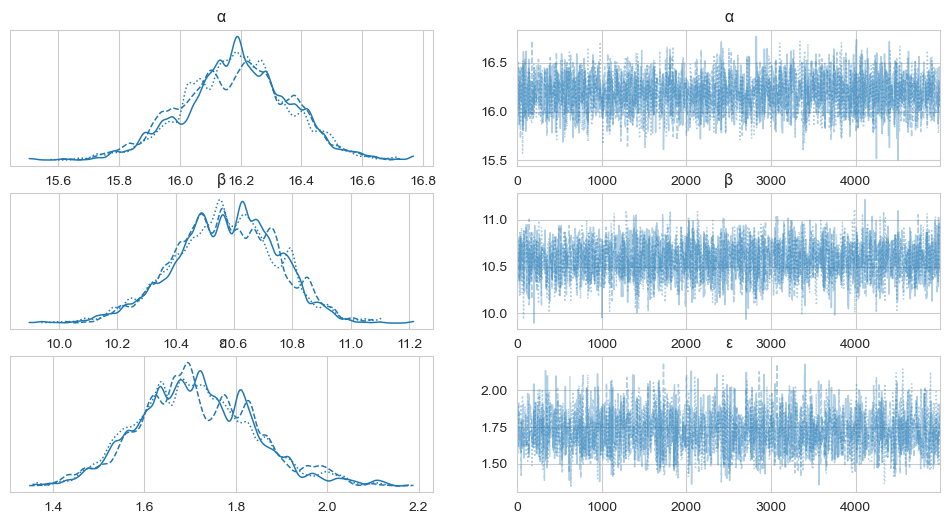

In [11]:
az.plot_trace(trace_m, var_names=['α', 'β', 'ε']);

In [12]:
az.summary(trace_m).head(5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,16.186,0.173,15.859,16.501,0.004,0.003,2317.0,2479.0,1.0
β,10.572,0.175,10.235,10.890,0.004,0.003,2184.0,2470.0,1.0
ε,1.714,0.127,1.461,1.945,0.003,0.002,1844.0,1918.0,1.0
μ[0],0.953,0.307,0.401,1.540,0.006,0.005,2294.0,2767.0,1.0
μ[1],5.952,0.243,5.536,6.435,0.005,0.004,2318.0,2964.0,1.0


/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


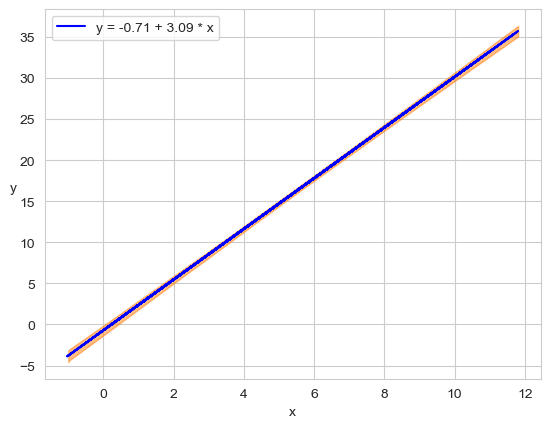

In [13]:
posterior_g = az.extract(trace_1)


alpha_m = posterior_g['α'].mean().item()
beta_m  = posterior_g['β'].mean().item()

draws = range(0, posterior_g.sample.size, 100)
plt.plot(X_train, alpha_m + beta_m * X_train, c='b',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

sig = az.plot_hdi(X_train, posterior_g['μ'].T, hdi_prob=0.94)

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend();

Sampling: [y_pred]


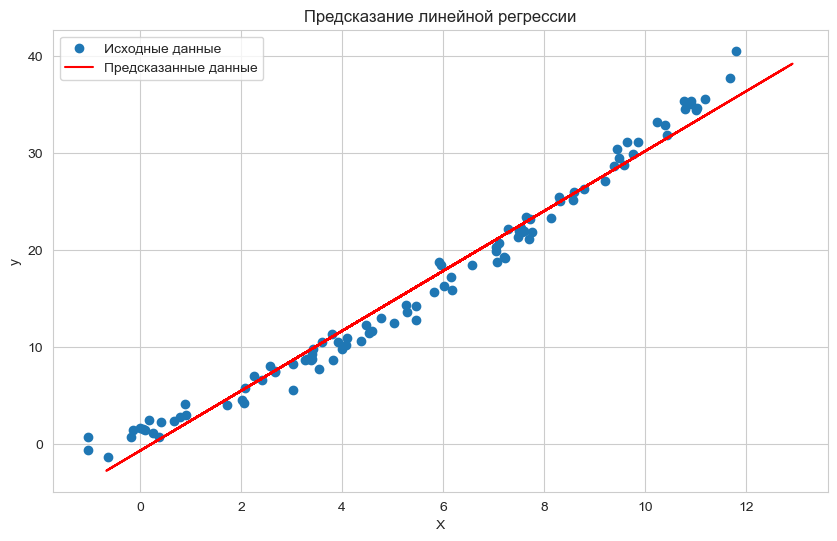

In [15]:
ppc = pm.sample_posterior_predictive(trace_1, model=model_g)

alpha = trace_1.posterior['α'].mean(("chain", "draw")).values
betta = trace_1.posterior["β"].mean(("chain", "draw")).values

X_test = pd.read_csv('regression/test_reg.csv')

y_pred_test = alpha + betta * X_test

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Исходные данные')
plt.plot(X_test, y_pred_test, color='red', label='Предсказанные данные')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Предсказание линейной регрессии')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [α_tmp, β, ε, ν_]


Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 14 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


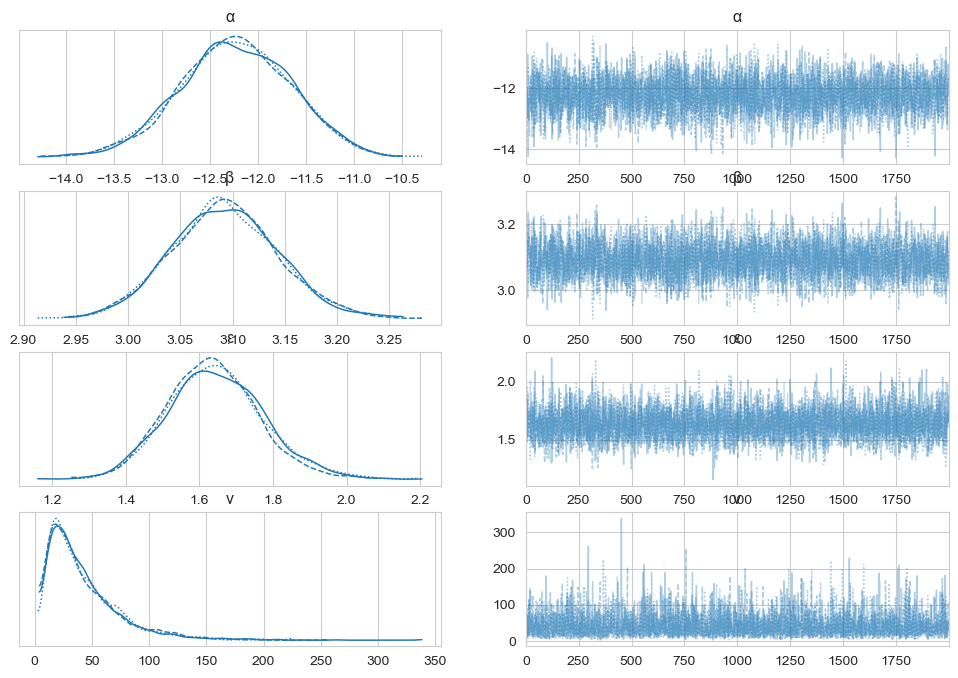

In [16]:
with pm.Model() as model_t:
    α_tmp = pm.Normal('α_tmp', mu=0, sigma=10)
    β = pm.Normal('β', mu=1, sigma=10)
    ε = pm.HalfNormal('ε', 5)
    ν_ = pm.Exponential('ν_', 1/30)
    ν = pm.Deterministic('ν', ν_+1)

    y_pred = pm.StudentT('y_pred', mu=α_tmp + β * X_train - X_train.mean(),
                         sigma=ε, nu=ν, observed=y_train)

    α = pm.Deterministic('α', α_tmp - β * X_train.mean())

    trace_t = pm.sample(2000, chains=3)

varnames = ['α', 'β', 'ε', 'ν']
az.plot_trace(trace_t, var_names=varnames);

In [17]:
pm.sample_posterior_predictive(trace_t, model=model_t, extend_inferencedata=True)
pm.sample_posterior_predictive(trace_1, model=model_g, extend_inferencedata=True)
y_t = trace_t.posterior_predictive['y_pred']
y_g = trace_1.posterior_predictive['y_pred']

Sampling: [y_pred]


Sampling: [y_pred]


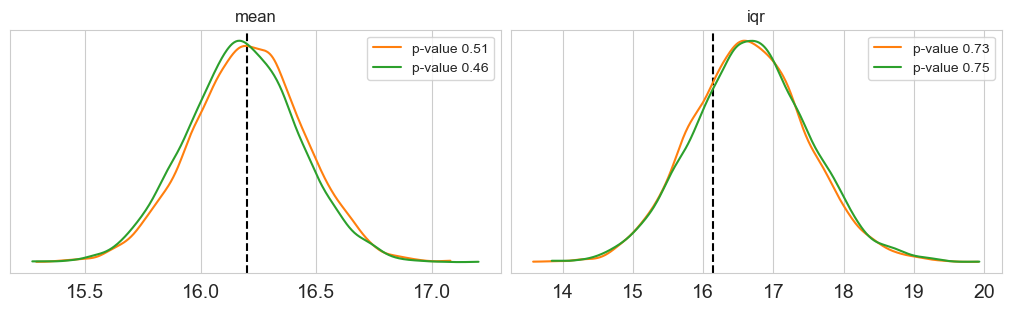

In [18]:

fig, ax = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)

# МАГИЧЕСКАЯ команда распаковки кортежа для его распаковки и передачи вычисления
def iqr(x, axis=0):
    return np.subtract(*np.percentile(x, [75, 25], axis=axis))

y_g_chain = y_g.stack(samples=('chain', 'draw')).values.T
y_t_chain = y_t.stack(samples=('chain', 'draw')).values.T

for idx, func in enumerate([np.mean, iqr]):
    T_obs = func(y_train)
    ax[idx].axvline(T_obs, 0, 1, color='k', ls='--')
    for d_sim, c in zip([y_g_chain, y_t_chain], ['C1', 'C2']):
        T_sim = func(d_sim, 1)
        p_value = np.mean(T_sim >= T_obs)
        az.plot_kde(T_sim, plot_kwargs={'color': c},
                    label=f'p-value {p_value:.2f}', ax=ax[idx])
    ax[idx].set_title(func.__name__)
    ax[idx].set_yticks([])
    ax[idx].legend()

## Сравнение моделей

In [19]:
pm.compute_log_likelihood(trace_1, model=model_g)

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [20]:
pm.compute_log_likelihood(trace_t, model=model_t)

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [21]:
diff_loo = az.compare({"model_g": trace_1, 'model_t':trace_t})
diff_loo

/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_g,0,-195.631876,3.365739,0.000000,1.0,6.994541,0.000000,False,log
model_t,1,-195.967890,3.422200,0.336014,0.0,6.898737,0.474239,False,log


/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


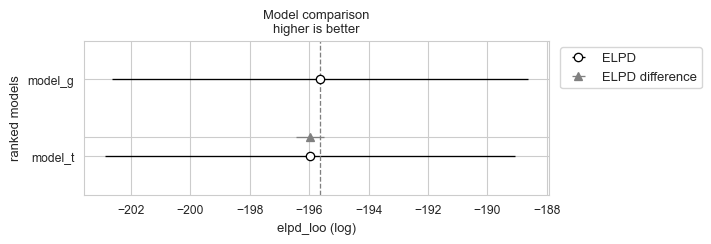

In [22]:
az.plot_compare(diff_loo);

In [23]:
diff_waic = az.compare({"model_g": trace_1, 'model_t':trace_t}, ic = 'waic')
diff_waic

/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/stats.py

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model_g,0,-195.622472,3.356336,0.000000,1.0,6.991143,0.000000,True,log
model_t,1,-195.958393,3.412703,0.335921,0.0,6.896125,0.473179,True,log


### Задача 2 - предсказание на тестовом наборе

In [24]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=1, sigma=1)
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', α + β * X_train)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_train)
    trace_g = pm.sample(2000, chains=4, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [α, β, ε]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.


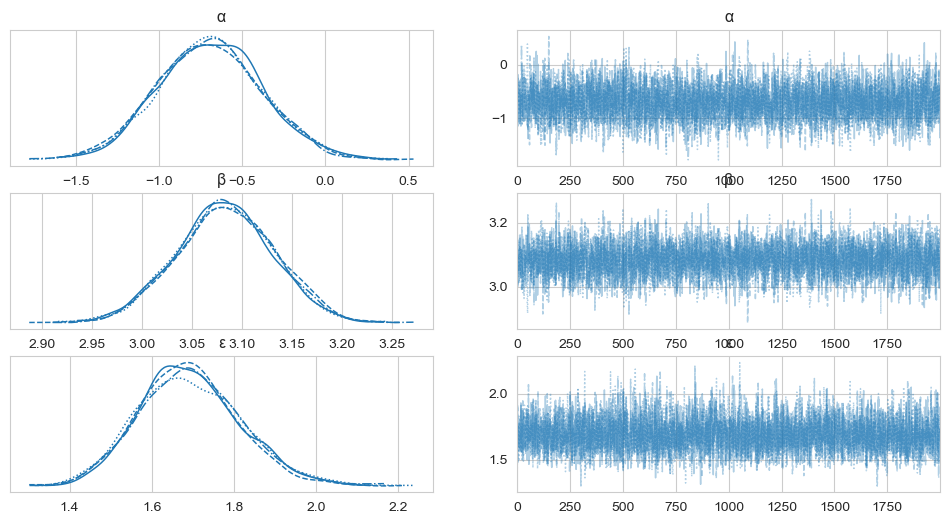

In [25]:
az.plot_trace(trace_g, var_names=['α', 'β', 'ε']);

In [26]:
az.summary(trace_g).head(5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.696,0.315,-1.261,-0.084,0.005,0.004,3363.0,4121.0,1.0
β,3.083,0.049,2.994,3.175,0.001,0.001,3528.0,3674.0,1.0
ε,1.693,0.124,1.460,1.920,0.002,0.001,4633.0,4654.0,1.0
μ[0],0.586,0.298,0.050,1.162,0.005,0.004,3409.0,4304.0,1.0
μ[1],5.711,0.236,5.283,6.169,0.004,0.003,3771.0,5202.0,1.0


In [28]:
alpha = trace_g.posterior['α'].mean(("chain", "draw")).values
betta = trace_g.posterior["β"].mean(("chain", "draw")).values

X_test = pd.read_csv('regression/test_reg.csv')

y_pred_test = alpha + betta * X_test

In [29]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_pred_test)

2.3679584057907452